# CanESM5 GMD paper Figure 16&17
## Ocean temperature, salinity and MOC section.



### history
- NCS - modified for retrograde simulations
- NCS, setup basic example, 2019-03-28

In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import iris
import iris.analysis.cartography
import sqlite3
import plotting_module as pltm

from cdo import *
#cdo = Cdo()
#cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')

/home/ncs001/.conda/envs/py3_sofia_analysis/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


# Prograde

In [2]:
moc=xr.open_mfdataset('/space/hall5/sitestore/eccc/crd/ccrn/users/jcl001/jcl-pro-pi1850-1d0/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-jcl-pro-pi1850-1d0/piControl/r1i1p1f1/Omon/msftmz/gn/v20190429/msftmz_Omon_CanESM5-jcl-pro-pi1850-1d0_piControl_r1i1p1f1_gn_[3]*.nc')['msftmz'].sel(time=slice('3151', '3250'))
mocm = moc.mean(dim='time')/1035./1e6

/tmp/ncs001/2520371/ipykernel_2478289/2161938473.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu_r").copy()
  cmap.set_bad(cfeature.COLORS['land'])


Text(0.5, 1.0, '(c)')

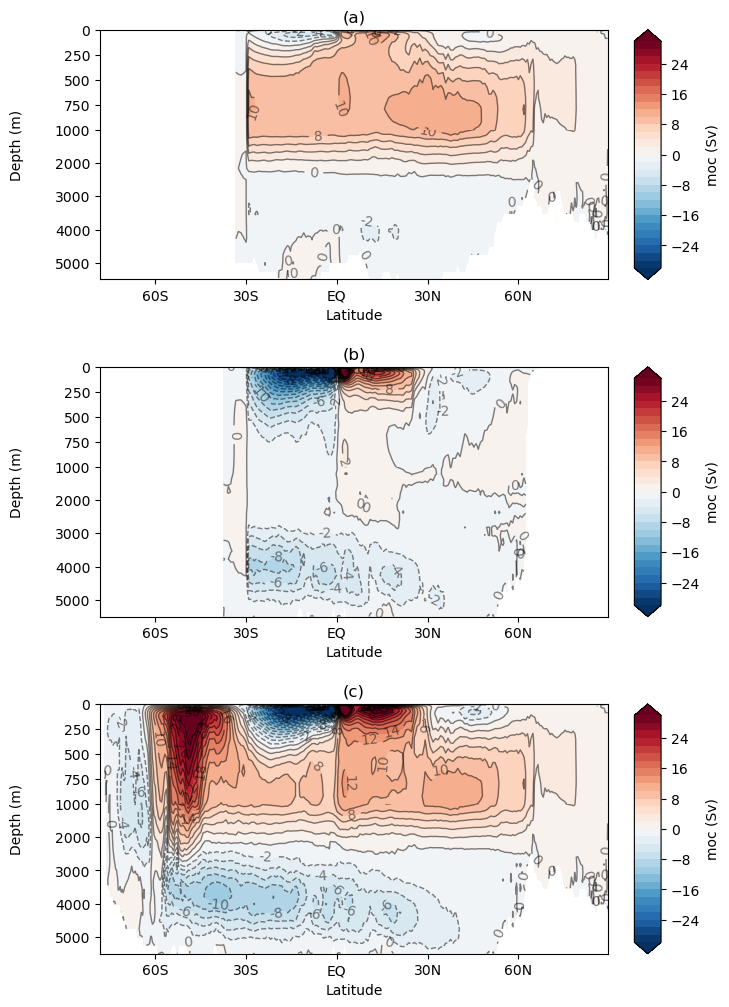

In [3]:
#moc fig
fig = plt.figure(figsize=(8,12))
outer_grid = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.35, width_ratios=[0.95, 0.05], height_ratios=[1,1,1])

cmap = plt.cm.RdBu_r
cmap.set_bad(cfeature.COLORS['land'])
levels = np.arange(-30,31,2)


axt, axm, axc = pltm.inner_gs_vardepth(outer_grid[0], labely=True, labelx=True)
for ax in [axt, axm]:
    cb  = ax.contourf(moc.lat, moc.lev, mocm.sel(basin=0), cmap=cmap, levels=levels, extend='both')
    cntr = ax.contour(moc.lat, moc.lev, mocm.sel(basin=0), levels=levels, colors='k', linewidths=1, alpha=0.5)
    ax.clabel(cntr,fmt='%1.0f')
plt.colorbar(cb, cax=axc, extend='both', label =r'moc (Sv)')
axt.set_title('(a)')

axt, axm, axc = pltm.inner_gs_vardepth(outer_grid[2], labely=True, labelx=True)
for ax in [axt, axm]:
    cb  = ax.contourf(moc.lat, moc.lev, mocm.sel(basin=1), cmap=cmap, levels=levels, extend='both')
    cntr = ax.contour(moc.lat, moc.lev, mocm.sel(basin=1), levels=levels, colors='k', linewidths=1, alpha=0.5)
    ax.clabel(cntr,fmt='%1.0f')
plt.colorbar(cb, cax=axc, extend='both', label=r'moc (Sv)')
axt.set_title('(b)')
 
axt, axm, axc = pltm.inner_gs_vardepth(outer_grid[4], labely=True,labelx=True)
for ax in [axt, axm]:
    cb  = ax.contourf(moc.lat, moc.lev, mocm.sel(basin=2), cmap=cmap, levels=levels, extend='both')
    cntr = ax.contour(moc.lat, moc.lev, mocm.sel(basin=2), levels=levels, colors='k', linewidths=1, alpha=0.5)
    ax.clabel(cntr,fmt='%1.0f')
plt.colorbar(cb, cax=axc, extend='both', label=r'moc (Sv)')
axt.set_title('(c)')

# Retrograde

In [4]:
moc=xr.open_mfdataset('/space/hall5/sitestore/eccc/crd/ccrn/users/jcl001/jcl-retro-pi1850-1d0/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-jcl-retro-pi1850-1d0/piControl/r1i1p1f1/Omon/msftmz/gn/v20190429/msftmz_Omon_CanESM5-jcl-retro-pi1850-1d0_piControl_r1i1p1f1_gn_[3]*.nc')['msftmz'].sel(time=slice('3151', '3250'))
mocm = moc.mean(dim='time')/1035./1e6

/tmp/ncs001/2520371/ipykernel_2478289/2161938473.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu_r").copy()
  cmap.set_bad(cfeature.COLORS['land'])


Text(0.5, 1.0, '(c)')

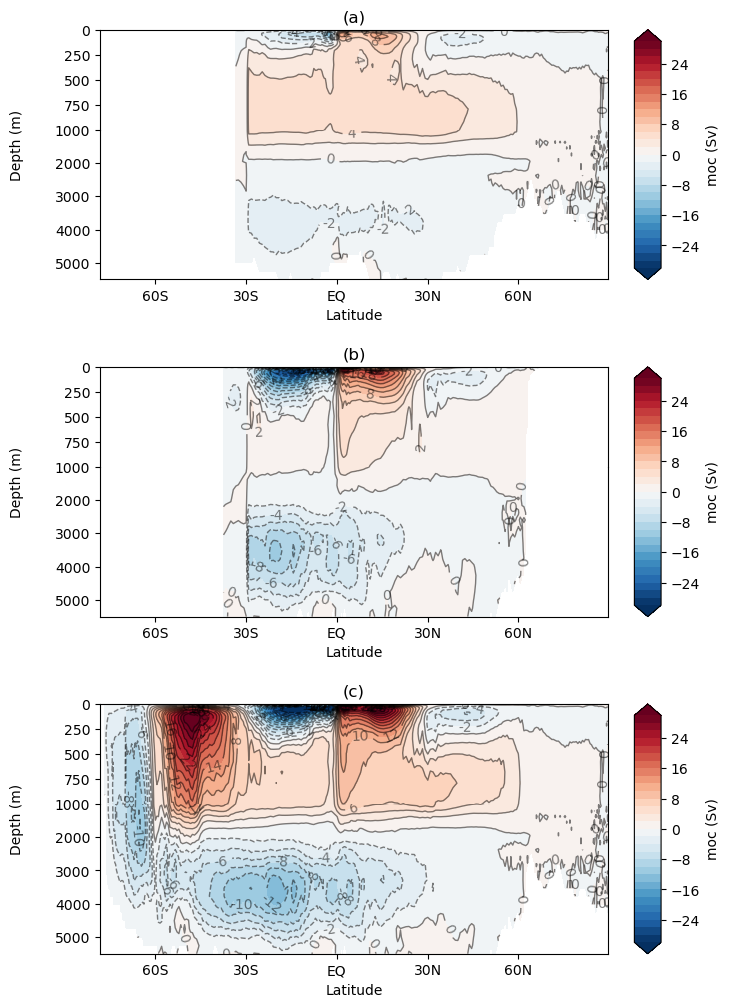

In [5]:
#moc fig
fig = plt.figure(figsize=(8,12))
outer_grid = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.35, width_ratios=[0.95, 0.05], height_ratios=[1,1,1])

cmap = plt.cm.RdBu_r
cmap.set_bad(cfeature.COLORS['land'])
levels = np.arange(-30,31,2)


axt, axm, axc = pltm.inner_gs_vardepth(outer_grid[0], labely=True, labelx=True)
for ax in [axt, axm]:
    cb  = ax.contourf(moc.lat, moc.lev, mocm.sel(basin=0), cmap=cmap, levels=levels, extend='both')
    cntr = ax.contour(moc.lat, moc.lev, mocm.sel(basin=0), levels=levels, colors='k', linewidths=1, alpha=0.5)
    ax.clabel(cntr,fmt='%1.0f')
plt.colorbar(cb, cax=axc, extend='both', label =r'moc (Sv)')
axt.set_title('(a)')

axt, axm, axc = pltm.inner_gs_vardepth(outer_grid[2], labely=True, labelx=True)
for ax in [axt, axm]:
    cb  = ax.contourf(moc.lat, moc.lev, mocm.sel(basin=1), cmap=cmap, levels=levels, extend='both')
    cntr = ax.contour(moc.lat, moc.lev, mocm.sel(basin=1), levels=levels, colors='k', linewidths=1, alpha=0.5)
    ax.clabel(cntr,fmt='%1.0f')
plt.colorbar(cb, cax=axc, extend='both', label=r'moc (Sv)')
axt.set_title('(b)')
 
axt, axm, axc = pltm.inner_gs_vardepth(outer_grid[4], labely=True,labelx=True)
for ax in [axt, axm]:
    cb  = ax.contourf(moc.lat, moc.lev, mocm.sel(basin=2), cmap=cmap, levels=levels, extend='both')
    cntr = ax.contour(moc.lat, moc.lev, mocm.sel(basin=2), levels=levels, colors='k', linewidths=1, alpha=0.5)
    ax.clabel(cntr,fmt='%1.0f')
plt.colorbar(cb, cax=axc, extend='both', label=r'moc (Sv)')
axt.set_title('(c)')